In [1110]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
gene_diff = pd.read_csv('/Users/csb/Desktop/RNA-seq/gene_exp.diff', sep='\t')

In [3]:
gene_diff

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,XLOC_000001,XLOC_000001,Lypla1,chr1:4807892-4846735,Ctrl,Ra,OK,26.022700,40.188100,0.626994,1.81330,0.02970,0.114980,no
1,XLOC_000002,XLOC_000002,Tcea1,chr1:4857693-4897909,Ctrl,Ra,OK,25.252900,69.262100,1.455620,4.31630,0.00005,0.000527,yes
2,XLOC_000003,XLOC_000003,Atp6v1h,chr1:5083172-5162549,Ctrl,Ra,OK,71.120700,126.695000,0.833019,2.46550,0.00170,0.011629,yes
3,XLOC_000004,XLOC_000004,Oprk1,chr1:5588492-5606133,Ctrl,Ra,NOTEST,0.051812,0.087206,0.751139,0.00000,1.00000,1.000000,no
4,XLOC_000005,XLOC_000005,Rb1cc1,chr1:6214661-6276104,Ctrl,Ra,OK,16.959000,11.950200,-0.505017,-1.38367,0.05645,0.184686,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72409,XLOC_024134,XLOC_024134,Ssty2,chrY:80463105-80465434,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72410,XLOC_024135,XLOC_024135,Gm20806,chrY:80756211-80757210,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72411,XLOC_024136,XLOC_024136,Gm20747,chrY:81799149-81801497,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72412,XLOC_024137,XLOC_024137,Gm20854,chrY:83789753-83927911,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no


In [4]:
# Extract genes with significance
#geneSig = gene_diff.loc[gene_diff['significant'] == 'yes']
#geneSig

In [5]:
# Control vs. Ra
d = gene_diff.loc[(gene_diff['sample_1'] == 'Ctrl') & (gene_diff['sample_2'] == 'Ra')]
d

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,XLOC_000001,XLOC_000001,Lypla1,chr1:4807892-4846735,Ctrl,Ra,OK,26.022700,40.188100,0.626994,1.81330,0.02970,0.114980,no
1,XLOC_000002,XLOC_000002,Tcea1,chr1:4857693-4897909,Ctrl,Ra,OK,25.252900,69.262100,1.455620,4.31630,0.00005,0.000527,yes
2,XLOC_000003,XLOC_000003,Atp6v1h,chr1:5083172-5162549,Ctrl,Ra,OK,71.120700,126.695000,0.833019,2.46550,0.00170,0.011629,yes
3,XLOC_000004,XLOC_000004,Oprk1,chr1:5588492-5606133,Ctrl,Ra,NOTEST,0.051812,0.087206,0.751139,0.00000,1.00000,1.000000,no
4,XLOC_000005,XLOC_000005,Rb1cc1,chr1:6214661-6276104,Ctrl,Ra,OK,16.959000,11.950200,-0.505017,-1.38367,0.05645,0.184686,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24133,XLOC_024134,XLOC_024134,Ssty2,chrY:80463105-80465434,Ctrl,Ra,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
24134,XLOC_024135,XLOC_024135,Gm20806,chrY:80756211-80757210,Ctrl,Ra,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
24135,XLOC_024136,XLOC_024136,Gm20747,chrY:81799149-81801497,Ctrl,Ra,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
24136,XLOC_024137,XLOC_024137,Gm20854,chrY:83789753-83927911,Ctrl,Ra,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no


In [6]:
ctrl_ra = d[['sample_1','sample_2','status','value_1','value_2','significant']]
ctrl_ra

,sample_1,sample_2,status,value_1,value_2,significant
0,Ctrl,Ra,OK,26.022700,40.188100,no
1,Ctrl,Ra,OK,25.252900,69.262100,yes
2,Ctrl,Ra,OK,71.120700,126.695000,yes
3,Ctrl,Ra,NOTEST,0.051812,0.087206,no
4,Ctrl,Ra,OK,16.959000,11.950200,no
...,...,...,...,...,...,...
24133,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24134,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24135,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24136,Ctrl,Ra,NOTEST,0.000000,0.000000,no


In [7]:
# Add 1 in FPKM values to rid zero's
ctrl_ra = ctrl_ra.assign(value_1=d['value_1'] + 1)
ctrl_ra = ctrl_ra.assign(value_2=d['value_2'] + 1)

ctrl_ra

,sample_1,sample_2,status,value_1,value_2,significant
0,Ctrl,Ra,OK,27.022700,41.188100,no
1,Ctrl,Ra,OK,26.252900,70.262100,yes
2,Ctrl,Ra,OK,72.120700,127.695000,yes
3,Ctrl,Ra,NOTEST,1.051812,1.087206,no
4,Ctrl,Ra,OK,17.959000,12.950200,no
...,...,...,...,...,...,...
24133,Ctrl,Ra,NOTEST,1.000000,1.000000,no
24134,Ctrl,Ra,NOTEST,1.000000,1.000000,no
24135,Ctrl,Ra,NOTEST,1.000000,1.000000,no
24136,Ctrl,Ra,NOTEST,1.000000,1.000000,no


In [8]:
# Take the logarithm 2 of the 'value_1' and 'value_2' columns
ctrl_ra[['value_1', 'value_2']] = ctrl_ra[['value_1', 'value_2']].apply(np.log2)
ctrl_ra

,sample_1,sample_2,status,value_1,value_2,significant
0,Ctrl,Ra,OK,4.756100,5.364156,no
1,Ctrl,Ra,OK,4.714405,6.134675,yes
2,Ctrl,Ra,OK,6.172341,6.996558,yes
3,Ctrl,Ra,NOTEST,0.072877,0.120625,no
4,Ctrl,Ra,OK,4.166635,3.694902,no
...,...,...,...,...,...,...
24133,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24134,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24135,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24136,Ctrl,Ra,NOTEST,0.000000,0.000000,no


In [9]:
# change column names
ctrl_ra.columns = ctrl_ra.columns.str.replace('value_1', 'Control')
ctrl_ra.columns = ctrl_ra.columns.str.replace('value_2', 'Infection(Ra)')
ctrl_ra

,sample_1,sample_2,status,Control,Infection(Ra),significant
0,Ctrl,Ra,OK,4.756100,5.364156,no
1,Ctrl,Ra,OK,4.714405,6.134675,yes
2,Ctrl,Ra,OK,6.172341,6.996558,yes
3,Ctrl,Ra,NOTEST,0.072877,0.120625,no
4,Ctrl,Ra,OK,4.166635,3.694902,no
...,...,...,...,...,...,...
24133,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24134,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24135,Ctrl,Ra,NOTEST,0.000000,0.000000,no
24136,Ctrl,Ra,NOTEST,0.000000,0.000000,no


In [10]:
# Subset Control and Ra with Significant value

df_sig = ctrl_ra.loc[ctrl_ra['significant'] == 'yes']
df_sig

,sample_1,sample_2,status,Control,Infection(Ra),significant
1,Ctrl,Ra,OK,4.714405,6.134675,yes
2,Ctrl,Ra,OK,6.172341,6.996558,yes
8,Ctrl,Ra,OK,2.566810,3.682214,yes
9,Ctrl,Ra,OK,0.300418,2.333461,yes
12,Ctrl,Ra,OK,4.737227,5.781994,yes
...,...,...,...,...,...,...
23976,Ctrl,Ra,OK,4.990392,2.173409,yes
23992,Ctrl,Ra,OK,8.212501,6.823864,yes
23994,Ctrl,Ra,OK,2.792433,0.688196,yes
24017,Ctrl,Ra,OK,5.092000,6.542113,yes


## Scatter Plot: Ctrl vs. Infection (Ra)

Control vs. Infection(Ra): 


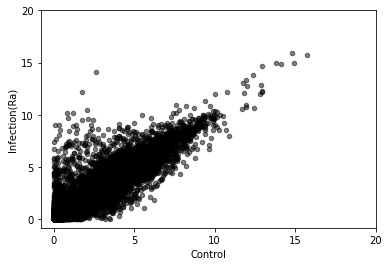

In [11]:
print('Control vs. Infection(Ra): ')

ax = ctrl_ra.plot.scatter(x='Control', y='Infection(Ra)', color='black', alpha=0.5)

# Set the x-axis and y-axis scales
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 20])

ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))

plt.show()

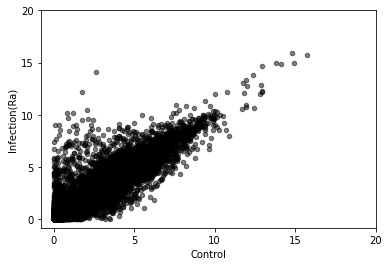

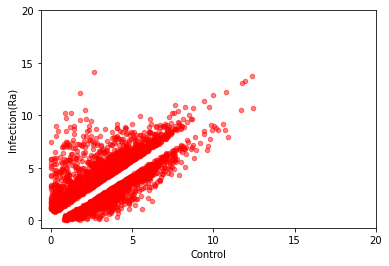

In [12]:
#Scatter Plot: Ctrl vs. Infection (Ra)

ax = ctrl_ra.plot.scatter(x='Control', y='Infection(Ra)', color='black', alpha=0.5)
ax2= df_sig.plot.scatter(x= 'Control', y='Infection(Ra)', color='red', alpha=0.5)


# Set the x-axis and y-axis scales
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 20])

ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))

ax2.set_xticks(np.arange(0,21,5))
ax2.set_yticks(np.arange(0,21,5))

plt.show()

Contorl vs. Infection(Ra):


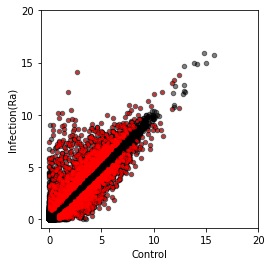

In [14]:
#Scatter Plot: Ctrl vs. Infection (Ra) Final
print('Contorl vs. Infection(Ra):' + '')

ax = ctrl_ra.plot.scatter(x='Control', y='Infection(Ra)', color='black', alpha=0.5)
ax2 = df_sig.plot.scatter(ax=ax, x= 'Control', y='Infection(Ra)', color='red', alpha=0.5, s=5)

#Set the x-axis and y-axis scales
ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))

ax2.set_xticks(np.arange(0,21,5))
ax2.set_yticks(np.arange(0,21,5))

# Adjust figure size
ax.set_aspect('equal')

#plot
plt.show()

In [15]:
# Control vs. Rv

df_1 = gene_diff.loc[(gene_diff['sample_1'] == 'Ctrl') & (gene_diff['sample_2'] == 'Rv')]
df_1

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
24138,XLOC_000001,XLOC_000001,Lypla1,chr1:4807892-4846735,Ctrl,Rv,OK,26.022700,29.455300,0.178756,0.451991,0.53055,0.762096,no
24139,XLOC_000002,XLOC_000002,Tcea1,chr1:4857693-4897909,Ctrl,Rv,OK,25.252900,58.355600,1.208420,3.355610,0.00005,0.000527,yes
24140,XLOC_000003,XLOC_000003,Atp6v1h,chr1:5083172-5162549,Ctrl,Rv,OK,71.120700,82.014500,0.205610,0.572608,0.42850,0.682396,no
24141,XLOC_000004,XLOC_000004,Oprk1,chr1:5588492-5606133,Ctrl,Rv,NOTEST,0.051812,0.069783,0.429591,0.000000,1.00000,1.000000,no
24142,XLOC_000005,XLOC_000005,Rb1cc1,chr1:6214661-6276104,Ctrl,Rv,OK,16.959000,13.787500,-0.298694,-0.818699,0.25795,0.509799,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48271,XLOC_024134,XLOC_024134,Ssty2,chrY:80463105-80465434,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
48272,XLOC_024135,XLOC_024135,Gm20806,chrY:80756211-80757210,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
48273,XLOC_024136,XLOC_024136,Gm20747,chrY:81799149-81801497,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
48274,XLOC_024137,XLOC_024137,Gm20854,chrY:83789753-83927911,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no


In [16]:
ctrl_rv = df_1[['sample_1','sample_2','status','value_1','value_2','significant']]
ctrl_rv

,sample_1,sample_2,status,value_1,value_2,significant
24138,Ctrl,Rv,OK,26.022700,29.455300,no
24139,Ctrl,Rv,OK,25.252900,58.355600,yes
24140,Ctrl,Rv,OK,71.120700,82.014500,no
24141,Ctrl,Rv,NOTEST,0.051812,0.069783,no
24142,Ctrl,Rv,OK,16.959000,13.787500,no
...,...,...,...,...,...,...
48271,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48272,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48273,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48274,Ctrl,Rv,NOTEST,0.000000,0.000000,no


In [17]:
ctrl_rv = ctrl_rv.assign(value_1=df_1['value_1'] + 1)
ctrl_rv = ctrl_rv.assign(value_2=df_1['value_2'] + 1)

ctrl_rv

,sample_1,sample_2,status,value_1,value_2,significant
24138,Ctrl,Rv,OK,27.022700,30.455300,no
24139,Ctrl,Rv,OK,26.252900,59.355600,yes
24140,Ctrl,Rv,OK,72.120700,83.014500,no
24141,Ctrl,Rv,NOTEST,1.051812,1.069783,no
24142,Ctrl,Rv,OK,17.959000,14.787500,no
...,...,...,...,...,...,...
48271,Ctrl,Rv,NOTEST,1.000000,1.000000,no
48272,Ctrl,Rv,NOTEST,1.000000,1.000000,no
48273,Ctrl,Rv,NOTEST,1.000000,1.000000,no
48274,Ctrl,Rv,NOTEST,1.000000,1.000000,no


In [18]:
ctrl_rv[['value_1', 'value_2']] = ctrl_rv[['value_1', 'value_2']].apply(np.log2)
ctrl_rv

,sample_1,sample_2,status,value_1,value_2,significant
24138,Ctrl,Rv,OK,4.756100,4.928621,no
24139,Ctrl,Rv,OK,4.714405,5.891312,yes
24140,Ctrl,Rv,OK,6.172341,6.375291,no
24141,Ctrl,Rv,NOTEST,0.072877,0.097318,no
24142,Ctrl,Rv,OK,4.166635,3.886306,no
...,...,...,...,...,...,...
48271,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48272,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48273,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48274,Ctrl,Rv,NOTEST,0.000000,0.000000,no


In [19]:
# change column names
ctrl_rv.columns = ctrl_rv.columns.str.replace('value_1', 'Control')
ctrl_rv.columns = ctrl_rv.columns.str.replace('value_2', 'Infection(Rv)')
ctrl_rv

,sample_1,sample_2,status,Control,Infection(Rv),significant
24138,Ctrl,Rv,OK,4.756100,4.928621,no
24139,Ctrl,Rv,OK,4.714405,5.891312,yes
24140,Ctrl,Rv,OK,6.172341,6.375291,no
24141,Ctrl,Rv,NOTEST,0.072877,0.097318,no
24142,Ctrl,Rv,OK,4.166635,3.886306,no
...,...,...,...,...,...,...
48271,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48272,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48273,Ctrl,Rv,NOTEST,0.000000,0.000000,no
48274,Ctrl,Rv,NOTEST,0.000000,0.000000,no


In [20]:
# Subset Control and Ra with Significant value

df1_sig = ctrl_rv.loc[ctrl_rv['significant'] == 'yes']
df1_sig

,sample_1,sample_2,status,Control,Infection(Rv),significant
24139,Ctrl,Rv,OK,4.714405,5.891312,yes
24146,Ctrl,Rv,OK,2.566810,3.264538,yes
24147,Ctrl,Rv,OK,0.300418,1.432200,yes
24161,Ctrl,Rv,OK,2.488294,1.787750,yes
24177,Ctrl,Rv,OK,0.403846,1.639102,yes
...,...,...,...,...,...,...
48130,Ctrl,Rv,OK,8.212501,7.315403,yes
48132,Ctrl,Rv,OK,2.792433,0.664233,yes
48144,Ctrl,Rv,OK,4.305679,1.650558,yes
48155,Ctrl,Rv,OK,5.092000,6.156261,yes


Control vs. Infection(Rv):


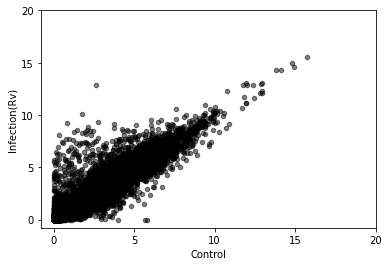

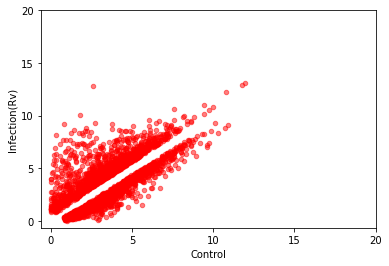

In [21]:
#Scatter Plot: Ctrl vs. Infection (Rv)
print('Control vs. Infection(Rv):'+'')

ax = ctrl_rv.plot.scatter(x='Control', y='Infection(Rv)', color='black', alpha=0.5)
ax2= df1_sig.plot.scatter(x= 'Control', y='Infection(Rv)', color='red', alpha=0.5)


# Set the x-axis and y-axis scales
#ax.set_xlim([0, 20])
#ax.set_ylim([0, 20])

ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))

ax2.set_xticks(np.arange(0,21,5))
ax2.set_yticks(np.arange(0,21,5))

plt.show()

Control vs. Infection(Rv):


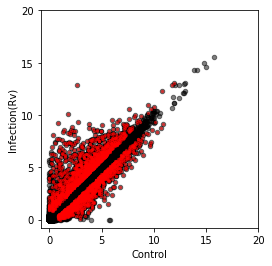

In [22]:
#Scatter Plot: Ctrl vs. Infection (Rv) Final
print('Control vs. Infection(Rv):'+'')

ax = ctrl_rv.plot.scatter(x='Control', y='Infection(Rv)', color='black', alpha=0.5)
ax2 = df1_sig.plot.scatter(ax=ax, x= 'Control', y='Infection(Rv)', color='red', alpha=0.5, s=5)

#Set the x-axis and y-axis scales
ax.set_xticks(np.arange(0,21,5))
ax.set_yticks(np.arange(0,21,5))

ax2.set_xticks(np.arange(0,21,5))
ax2.set_yticks(np.arange(0,21,5))

# Adjust figure size
ax.set_aspect('equal')

#plot
plt.show()

# Ctrl vs. Ra or Rv (FDR < 0.001) Significant Gene

In [374]:
gene_diff

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,XLOC_000001,XLOC_000001,Lypla1,chr1:4807892-4846735,Ctrl,Ra,OK,26.022700,40.188100,0.626994,1.81330,0.02970,0.114980,no
1,XLOC_000002,XLOC_000002,Tcea1,chr1:4857693-4897909,Ctrl,Ra,OK,25.252900,69.262100,1.455620,4.31630,0.00005,0.000527,yes
2,XLOC_000003,XLOC_000003,Atp6v1h,chr1:5083172-5162549,Ctrl,Ra,OK,71.120700,126.695000,0.833019,2.46550,0.00170,0.011629,yes
3,XLOC_000004,XLOC_000004,Oprk1,chr1:5588492-5606133,Ctrl,Ra,NOTEST,0.051812,0.087206,0.751139,0.00000,1.00000,1.000000,no
4,XLOC_000005,XLOC_000005,Rb1cc1,chr1:6214661-6276104,Ctrl,Ra,OK,16.959000,11.950200,-0.505017,-1.38367,0.05645,0.184686,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72409,XLOC_024134,XLOC_024134,Ssty2,chrY:80463105-80465434,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72410,XLOC_024135,XLOC_024135,Gm20806,chrY:80756211-80757210,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72411,XLOC_024136,XLOC_024136,Gm20747,chrY:81799149-81801497,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72412,XLOC_024137,XLOC_024137,Gm20854,chrY:83789753-83927911,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no


In [502]:
gene = gene_diff.loc[:, ['gene','sample_1','sample_2', 'status','value_1','value_2','log2(fold_change)','test_stat','p_value', 'q_value','significant']]
gene

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,Lypla1,Ctrl,Ra,OK,26.022700,40.188100,0.626994,1.81330,0.02970,0.114980,no
1,Tcea1,Ctrl,Ra,OK,25.252900,69.262100,1.455620,4.31630,0.00005,0.000527,yes
2,Atp6v1h,Ctrl,Ra,OK,71.120700,126.695000,0.833019,2.46550,0.00170,0.011629,yes
3,Oprk1,Ctrl,Ra,NOTEST,0.051812,0.087206,0.751139,0.00000,1.00000,1.000000,no
4,Rb1cc1,Ctrl,Ra,OK,16.959000,11.950200,-0.505017,-1.38367,0.05645,0.184686,no
...,...,...,...,...,...,...,...,...,...,...,...
72409,Ssty2,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72410,Gm20806,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72411,Gm20747,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
72412,Gm20854,Ra,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no


### Control vs. Ra or Rv (FPKM > 10) Significant Genes, FDR < 0.001

In [503]:
# Extract all Ctrl samples 

ctrl= gene.loc[(gene['sample_1'] == 'Ctrl')]
ctrl

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,Lypla1,Ctrl,Ra,OK,26.022700,40.188100,0.626994,1.81330,0.02970,0.114980,no
1,Tcea1,Ctrl,Ra,OK,25.252900,69.262100,1.455620,4.31630,0.00005,0.000527,yes
2,Atp6v1h,Ctrl,Ra,OK,71.120700,126.695000,0.833019,2.46550,0.00170,0.011629,yes
3,Oprk1,Ctrl,Ra,NOTEST,0.051812,0.087206,0.751139,0.00000,1.00000,1.000000,no
4,Rb1cc1,Ctrl,Ra,OK,16.959000,11.950200,-0.505017,-1.38367,0.05645,0.184686,no
...,...,...,...,...,...,...,...,...,...,...,...
48271,Ssty2,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
48272,Gm20806,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
48273,Gm20747,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no
48274,Gm20854,Ctrl,Rv,NOTEST,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,no


In [508]:
# Ctrl vs. Ra

ra = ctrl.loc[(ctrl['sample_1'] == 'Ctrl') & (ctrl['sample_2']== 'Ra')& (ctrl['q_value'] < 0.001)]
ra = ra.loc[(ra['value_1']> 10) | (ra['value_2']> 10)] # at least one sample has to be FPKM >10
ra

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
1,Tcea1,Ctrl,Ra,OK,25.25290,69.26210,1.45562,4.31630,0.00005,0.000527,yes
8,Rrs1,Ctrl,Ra,OK,4.92498,11.83680,1.26509,3.75695,0.00005,0.000527,yes
55,Dst,Ctrl,Ra,OK,2.94887,21.29980,2.85260,7.37381,0.00005,0.000527,yes
64,Hs6st1,Ctrl,Ra,OK,20.26740,7.06629,-1.52013,-4.73964,0.00005,0.000527,yes
111,Stat1,Ctrl,Ra,OK,17.73520,364.75900,4.36225,11.51950,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...
23950,Acsl4,Ctrl,Ra,OK,35.16480,125.68800,1.83765,5.22024,0.00005,0.000527,yes
23976,Kctd12b,Ctrl,Ra,OK,30.78760,3.51088,-3.13244,-7.68375,0.00005,0.000527,yes
23992,Sat1,Ctrl,Ra,OK,295.62600,112.28900,-1.39655,-3.75683,0.00005,0.000527,yes
24017,Mospd2,Ctrl,Ra,OK,33.10710,92.19060,1.47748,4.59985,0.00005,0.000527,yes


In [505]:
# Ctrl vs. Rv

rv = ctrl.loc[(ctrl['sample_1'] == 'Ctrl') & (ctrl['sample_2']== 'Rv')&(ctrl['q_value'] < 0.001)]
rv = rv.loc[(rv['value_1']> 10) | (rv['value_2']> 10)] # at least one sample has to be FPKM >10
rv

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
24139,Tcea1,Ctrl,Rv,OK,25.25290,58.35560,1.20842,3.35561,0.00005,0.000527,yes
24193,Dst,Ctrl,Rv,OK,2.94887,12.53430,2.08764,5.40339,0.00005,0.000527,yes
24202,Hs6st1,Ctrl,Rv,OK,20.26740,6.43745,-1.65460,-4.54182,0.00005,0.000527,yes
24249,Stat1,Ctrl,Rv,OK,17.73520,394.81000,4.47647,11.20100,0.00005,0.000527,yes
24277,Cflar,Ctrl,Rv,OK,22.17090,86.81930,1.96935,5.06145,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...
48066,Bex1,Ctrl,Rv,OK,16.20820,1.35226,-3.58328,-7.52508,0.00005,0.000527,yes
48083,Psmd10,Ctrl,Rv,OK,15.31580,46.79480,1.61133,4.08693,0.00005,0.000527,yes
48088,Acsl4,Ctrl,Rv,OK,35.16480,87.64920,1.31761,3.58856,0.00005,0.000527,yes
48114,Kctd12b,Ctrl,Rv,OK,30.78760,3.76249,-3.03259,-7.38620,0.00005,0.000527,yes


In [735]:
# Intersecting Genes

#ra_gene = ra[['gene','sample_1']] # gene list of ctrl vs. ra
#rv_gene = rv[['gene','sample_1']] # gene list of ctrl vs. rv

#df_int = ra_gene[ra_gene['gene'].isin(rv_gene['gene'])]
df_int=ra.merge(rv, on=['gene'], how='inner')

df_int # 809 common DEG in both samples

,gene,sample_1_x,sample_2_x,status_x,value_1_x,value_2_x,log2(fold_change)_x,test_stat_x,p_value_x,q_value_x,...,sample_1_y,sample_2_y,status_y,value_1_y,value_2_y,log2(fold_change)_y,test_stat_y,p_value_y,q_value_y,significant_y
0,Tcea1,Ctrl,Ra,OK,25.25290,69.262100,1.45562,4.31630,0.00005,0.000527,...,Ctrl,Rv,OK,25.25290,58.35560,1.20842,3.35561,0.00005,0.000527,yes
1,Dst,Ctrl,Ra,OK,2.94887,21.299800,2.85260,7.37381,0.00005,0.000527,...,Ctrl,Rv,OK,2.94887,12.53430,2.08764,5.40339,0.00005,0.000527,yes
2,Hs6st1,Ctrl,Ra,OK,20.26740,7.066290,-1.52013,-4.73964,0.00005,0.000527,...,Ctrl,Rv,OK,20.26740,6.43745,-1.65460,-4.54182,0.00005,0.000527,yes
3,Stat1,Ctrl,Ra,OK,17.73520,364.759000,4.36225,11.51950,0.00005,0.000527,...,Ctrl,Rv,OK,17.73520,394.81000,4.47647,11.20100,0.00005,0.000527,yes
4,Cflar,Ctrl,Ra,OK,22.17090,176.565000,2.99346,7.71005,0.00005,0.000527,...,Ctrl,Rv,OK,22.17090,86.81930,1.96935,5.06145,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,Bex1,Ctrl,Ra,OK,16.20820,0.597078,-4.76266,-8.50875,0.00005,0.000527,...,Ctrl,Rv,OK,16.20820,1.35226,-3.58328,-7.52508,0.00005,0.000527,yes
805,Psmd10,Ctrl,Ra,OK,15.31580,64.212600,2.06784,5.37367,0.00005,0.000527,...,Ctrl,Rv,OK,15.31580,46.79480,1.61133,4.08693,0.00005,0.000527,yes
806,Acsl4,Ctrl,Ra,OK,35.16480,125.688000,1.83765,5.22024,0.00005,0.000527,...,Ctrl,Rv,OK,35.16480,87.64920,1.31761,3.58856,0.00005,0.000527,yes
807,Kctd12b,Ctrl,Ra,OK,30.78760,3.510880,-3.13244,-7.68375,0.00005,0.000527,...,Ctrl,Rv,OK,30.78760,3.76249,-3.03259,-7.38620,0.00005,0.000527,yes


# Venn Diagram

In [721]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

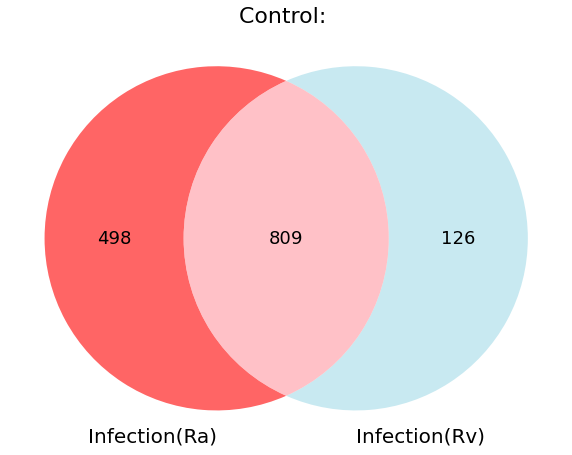

In [723]:
plt.figure(figsize=(10,10))

# Create the Venn diagram
vd2 =venn2_unweighted(subsets = (498, 126, 809),
                 set_labels=('Infection(Ra)', 'Infection(Rv)', '809'), 
                 set_colors=('red','#A4DBE8'), 
                 alpha = 0.6)

# Draw circle outline
#c= venn2_circles((1305, 933, 807), linestyle='solid', linewidth = 1, color ='black')

# Customize Label
for text in vd2.set_labels: #chang label size
    text.set_fontsize(20);
    
for text in vd2.subset_labels: # change number size
    text.set_fontsize(18)

# Show the plot
plt.title("Control: ",fontsize=22)
#plt.figure(figuresize=(15,15))
plt.show()


# Differentially expressed between Ra and Rv infection

In [1052]:
df_int

,gene,sample_1_x,sample_2_x,status_x,value_1_x,value_2_x,log2(fold_change)_x,test_stat_x,p_value_x,q_value_x,...,sample_1_y,sample_2_y,status_y,value_1_y,value_2_y,log2(fold_change)_y,test_stat_y,p_value_y,q_value_y,significant_y
0,Tcea1,Ctrl,Ra,OK,25.25290,69.262100,1.45562,4.31630,0.00005,0.000527,...,Ctrl,Rv,OK,25.25290,58.35560,1.20842,3.35561,0.00005,0.000527,yes
1,Dst,Ctrl,Ra,OK,2.94887,21.299800,2.85260,7.37381,0.00005,0.000527,...,Ctrl,Rv,OK,2.94887,12.53430,2.08764,5.40339,0.00005,0.000527,yes
2,Hs6st1,Ctrl,Ra,OK,20.26740,7.066290,-1.52013,-4.73964,0.00005,0.000527,...,Ctrl,Rv,OK,20.26740,6.43745,-1.65460,-4.54182,0.00005,0.000527,yes
3,Stat1,Ctrl,Ra,OK,17.73520,364.759000,4.36225,11.51950,0.00005,0.000527,...,Ctrl,Rv,OK,17.73520,394.81000,4.47647,11.20100,0.00005,0.000527,yes
4,Cflar,Ctrl,Ra,OK,22.17090,176.565000,2.99346,7.71005,0.00005,0.000527,...,Ctrl,Rv,OK,22.17090,86.81930,1.96935,5.06145,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,Bex1,Ctrl,Ra,OK,16.20820,0.597078,-4.76266,-8.50875,0.00005,0.000527,...,Ctrl,Rv,OK,16.20820,1.35226,-3.58328,-7.52508,0.00005,0.000527,yes
805,Psmd10,Ctrl,Ra,OK,15.31580,64.212600,2.06784,5.37367,0.00005,0.000527,...,Ctrl,Rv,OK,15.31580,46.79480,1.61133,4.08693,0.00005,0.000527,yes
806,Acsl4,Ctrl,Ra,OK,35.16480,125.688000,1.83765,5.22024,0.00005,0.000527,...,Ctrl,Rv,OK,35.16480,87.64920,1.31761,3.58856,0.00005,0.000527,yes
807,Kctd12b,Ctrl,Ra,OK,30.78760,3.510880,-3.13244,-7.68375,0.00005,0.000527,...,Ctrl,Rv,OK,30.78760,3.76249,-3.03259,-7.38620,0.00005,0.000527,yes


In [1053]:
# Ra vs. Rv with FDR < 0.001 and FPKM >10
ra_rv = gene.loc[(gene['sample_1'] == 'Ra') & (gene['sample_2'] == 'Rv') &(gene['q_value'] < 0.001)]
ra_rv = ra_rv.loc[(ra_rv['value_1']>10)| (ra_rv['value_2']>10)]
ra_rv

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
48334,Ptpn18,Ra,Rv,OK,9.49658,21.73020,1.19422,3.33501,0.00005,0.000527,yes
48479,Cyp27a1,Ra,Rv,OK,4.52616,13.38680,1.56445,3.73657,0.00005,0.000527,yes
48554,Agap1,Ra,Rv,OK,10.98460,4.48745,-1.29151,-3.63773,0.00005,0.000527,yes
48575,Gpc1,Ra,Rv,OK,33.40940,11.42060,-1.54862,-4.59277,0.00005,0.000527,yes
48616,Serpinb2,Ra,Rv,OK,513.10400,20.76990,-4.62668,-14.98500,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...
71132,Alas1,Ra,Rv,OK,565.96500,152.26800,-1.89410,-4.85980,0.00005,0.000527,yes
71563,"F630028O10Rik,Mir223",Ra,Rv,OK,33.56630,13.68420,-1.29451,-4.09407,0.00005,0.000527,yes
71620,A630033H20Rik,Ra,Rv,OK,17.34260,4.55165,-1.92986,-4.94016,0.00005,0.000527,yes
72029,Cetn2,Ra,Rv,OK,84.94780,39.81440,-1.09329,-3.41367,0.00005,0.000527,yes


In [1054]:
# 82 genes that are DE between Ra and Rv
#intx = df_int[df_int['gene'].isin(ra_rv['gene'])]
#intx 

intx = ra_rv.merge(df_int, on=['gene'], how='inner')
intx

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,...,sample_1_y,sample_2_y,status_y,value_1_y,value_2_y,log2(fold_change)_y,test_stat_y,p_value_y,q_value_y,significant_y
0,Cyp27a1,Ra,Rv,OK,4.52616,13.3868,1.56445,3.73657,0.00005,0.000527,...,Ctrl,Rv,OK,32.681000,13.3868,-1.28764,-3.38429,0.00005,0.000527,yes
1,Serpinb2,Ra,Rv,OK,513.10400,20.7699,-4.62668,-14.98500,0.00005,0.000527,...,Ctrl,Rv,OK,1.611980,20.7699,3.68759,7.58907,0.00005,0.000527,yes
2,Rab7b,Ra,Rv,OK,20.78690,43.3432,1.06013,2.85444,0.00010,0.000991,...,Ctrl,Rv,OK,118.964000,43.3432,-1.45664,-3.94051,0.00005,0.000527,yes
3,Ptgs2,Ra,Rv,OK,371.33000,29.0941,-3.67390,-10.64330,0.00005,0.000527,...,Ctrl,Rv,OK,0.328475,29.0941,6.46880,10.00940,0.00005,0.000527,yes
4,Mgat4a,Ra,Rv,OK,70.09530,25.9314,-1.43462,-4.29402,0.00005,0.000527,...,Ctrl,Rv,OK,6.680070,25.9314,1.95676,5.23849,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Acsl1,Ra,Rv,OK,431.43400,186.2550,-1.21186,-3.16163,0.00005,0.000527,...,Ctrl,Rv,OK,15.459900,186.2550,3.59068,9.53738,0.00005,0.000527,yes
78,Gas6,Ra,Rv,OK,8.39169,17.3220,1.04557,2.90775,0.00010,0.000991,...,Ctrl,Rv,OK,82.042200,17.3220,-2.24376,-6.19994,0.00005,0.000527,yes
79,Bcl2a1a,Ra,Rv,OK,395.83800,99.9439,-1.98572,-5.86794,0.00005,0.000527,...,Ctrl,Rv,OK,4.162480,99.9439,4.58560,9.01842,0.00005,0.000527,yes
80,Zc3h12c,Ra,Rv,OK,43.01970,18.7162,-1.20071,-3.47367,0.00005,0.000527,...,Ctrl,Rv,OK,7.454010,18.7162,1.32820,3.52703,0.00005,0.000527,yes


In [1055]:
intx = intx[['gene','value_1_y','value_1','value_2']].rename(columns={'gene': 'gene','value_1_y':'Control','value_1':'Ra','value_2':'Rv'})
intx

,gene,Control,Ra,Rv
0,Cyp27a1,32.681000,4.52616,13.3868
1,Serpinb2,1.611980,513.10400,20.7699
2,Rab7b,118.964000,20.78690,43.3432
3,Ptgs2,0.328475,371.33000,29.0941
4,Mgat4a,6.680070,70.09530,25.9314
...,...,...,...,...
77,Acsl1,15.459900,431.43400,186.2550
78,Gas6,82.042200,8.39169,17.3220
79,Bcl2a1a,4.162480,395.83800,99.9439
80,Zc3h12c,7.454010,43.01970,18.7162


In [1083]:
df_fpkm = pd.read_csv('/Users/csb/Desktop/RNA-seq/genes.fpkm_tracking', sep='\t')
df_fpkm

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,Ctrl_FPKM,...,Ctrl_conf_hi,Ctrl_status,Ra_FPKM,Ra_conf_lo,Ra_conf_hi,Ra_status,Rv_FPKM,Rv_conf_lo,Rv_conf_hi,Rv_status
0,XLOC_000001,-,-,XLOC_000001,Lypla1,TSS1,chr1:4807892-4846735,-,-,26.022700,...,36.021700,OK,40.188100,28.67050,51.705600,OK,29.455300,17.9357,40.974900,OK
1,XLOC_000002,-,-,XLOC_000002,Tcea1,"TSS2,TSS3",chr1:4857693-4897909,-,-,25.252900,...,34.245800,OK,69.262100,48.28260,90.241700,OK,58.355600,37.9381,78.773100,OK
2,XLOC_000003,-,-,XLOC_000003,Atp6v1h,TSS4,chr1:5083172-5162549,-,-,71.120700,...,96.341500,OK,126.695000,87.92710,165.463000,OK,82.014500,53.3639,110.665000,OK
3,XLOC_000004,-,-,XLOC_000004,Oprk1,TSS5,chr1:5588492-5606133,-,-,0.051812,...,0.137959,OK,0.087206,0.00000,0.191199,OK,0.069783,0.0000,0.168949,OK
4,XLOC_000005,-,-,XLOC_000005,Rb1cc1,TSS6,chr1:6214661-6276104,-,-,16.959000,...,22.988000,OK,11.950200,7.64768,16.252700,OK,13.787500,8.8273,18.747600,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24133,XLOC_024134,-,-,XLOC_024134,Ssty2,TSS27005,chrY:80463105-80465434,-,-,0.000000,...,0.000000,OK,0.000000,0.00000,0.000000,OK,0.000000,0.0000,0.000000,OK
24134,XLOC_024135,-,-,XLOC_024135,Gm20806,TSS27006,chrY:80756211-80757210,-,-,0.000000,...,0.000000,OK,0.000000,0.00000,0.000000,OK,0.000000,0.0000,0.000000,OK
24135,XLOC_024136,-,-,XLOC_024136,Gm20747,TSS27007,chrY:81799149-81801497,-,-,0.000000,...,0.000000,OK,0.000000,0.00000,0.000000,OK,0.000000,0.0000,0.000000,OK
24136,XLOC_024137,-,-,XLOC_024137,Gm20854,TSS27008,chrY:83789753-83927911,-,-,0.000000,...,0.000000,OK,0.000000,0.00000,0.000000,OK,0.000000,0.0000,0.000000,OK


In [1084]:
df_fpkm = df_fpkm[['gene_short_name', 'Ctrl_FPKM', 'Ra_FPKM','Rv_FPKM']]
df_fpkm

,gene_short_name,Ctrl_FPKM,Ra_FPKM,Rv_FPKM
0,Lypla1,26.022700,40.188100,29.455300
1,Tcea1,25.252900,69.262100,58.355600
2,Atp6v1h,71.120700,126.695000,82.014500
3,Oprk1,0.051812,0.087206,0.069783
4,Rb1cc1,16.959000,11.950200,13.787500
...,...,...,...,...
24133,Ssty2,0.000000,0.000000,0.000000
24134,Gm20806,0.000000,0.000000,0.000000
24135,Gm20747,0.000000,0.000000,0.000000
24136,Gm20854,0.000000,0.000000,0.000000


In [1085]:
df_deg = df_fpkm.rename(columns={'gene_short_name': 'gene','Ctrl_FPKM':'Control','Ra_FPKM':'Ra','Rv_FPKM':'Rv'})
df_deg = intx.merge(df_deg, on='gene')
df_deg

,gene,Control_x,Ra_x,Rv_x,Control_y,Ra_y,Rv_y
0,Cyp27a1,32.681000,4.52616,13.3868,32.681000,4.52616,13.3868
1,Serpinb2,1.611980,513.10400,20.7699,1.611980,513.10400,20.7699
2,Rab7b,118.964000,20.78690,43.3432,118.964000,20.78690,43.3432
3,Ptgs2,0.328475,371.33000,29.0941,0.328475,371.33000,29.0941
4,Mgat4a,6.680070,70.09530,25.9314,6.680070,70.09530,25.9314
...,...,...,...,...,...,...,...
80,Acsl1,15.459900,431.43400,186.2550,15.459900,431.43400,186.2550
81,Gas6,82.042200,8.39169,17.3220,82.042200,8.39169,17.3220
82,Bcl2a1a,4.162480,395.83800,99.9439,4.162480,395.83800,99.9439
83,Zc3h12c,7.454010,43.01970,18.7162,7.454010,43.01970,18.7162


In [1086]:
df_deg = df_deg[['gene','Control_x','Ra_x','Rv_x']].rename(columns={'gene':'gene','Control_x':'Control','Ra_x':'Ra','Rv_x':'Rv'})
df_deg

,gene,Control,Ra,Rv
0,Cyp27a1,32.681000,4.52616,13.3868
1,Serpinb2,1.611980,513.10400,20.7699
2,Rab7b,118.964000,20.78690,43.3432
3,Ptgs2,0.328475,371.33000,29.0941
4,Mgat4a,6.680070,70.09530,25.9314
...,...,...,...,...
80,Acsl1,15.459900,431.43400,186.2550
81,Gas6,82.042200,8.39169,17.3220
82,Bcl2a1a,4.162480,395.83800,99.9439
83,Zc3h12c,7.454010,43.01970,18.7162


In [1089]:
#center the values in each column of the DataFrame
df_cent = df_deg.set_index('gene',inplace = True)

In [1090]:
# Mean centered and Log transformed
df_cent = df_deg.add(1).apply(lambda x: np.log2(x)-np.log2(x.mean()))
df_cent

,Control,Ra,Rv
gene,,,
Cyp27a1,-0.275633,-5.589566,-2.683016
Serpinb2,-3.964352,0.950073,-2.085426
Rab7b,1.556962,-3.610454,-1.059048
Ptgs2,-4.939725,0.484595,-1.618281
Mgat4a,-2.408376,-1.904161,-1.778472
...,...,...,...
Acsl1,-1.308612,0.700493,1.019171
Gas6,1.026277,-4.824459,-2.334184
Bcl2a1a,-2.981432,0.576563,0.127721


In [1091]:
df_cent['group']=df_cent.apply(lambda x: 'Ctrl>Rv>Ra' if x['Control']>x['Rv']>x['Ra']
                      else 'Rv>Ra>Ctrl'if x['Rv']>x['Ra']>x['Control']
                      else 'Ra>Ctrl>Rv' if x['Ra']>x['Control']>x['Rv']
                      else 'Ra>Rv>Ctrl' if x['Ra']>x['Rv']>x['Control']
                      else 'Other', axis=1)

In [1092]:
df_cent

,Control,Ra,Rv,group
gene,,,,
Cyp27a1,-0.275633,-5.589566,-2.683016,Ctrl>Rv>Ra
Serpinb2,-3.964352,0.950073,-2.085426,Ra>Rv>Ctrl
Rab7b,1.556962,-3.610454,-1.059048,Ctrl>Rv>Ra
Ptgs2,-4.939725,0.484595,-1.618281,Ra>Rv>Ctrl
Mgat4a,-2.408376,-1.904161,-1.778472,Rv>Ra>Ctrl
...,...,...,...,...
Acsl1,-1.308612,0.700493,1.019171,Rv>Ra>Ctrl
Gas6,1.026277,-4.824459,-2.334184,Ctrl>Rv>Ra
Bcl2a1a,-2.981432,0.576563,0.127721,Ra>Rv>Ctrl


# Heatmap

In [1099]:
df_map =df_deg.reset_index(level='gene')
df_map = df_map[['Control','Ra','Rv']]
df_map

,Control,Ra,Rv
0,32.681000,4.52616,13.3868
1,1.611980,513.10400,20.7699
2,118.964000,20.78690,43.3432
3,0.328475,371.33000,29.0941
4,6.680070,70.09530,25.9314
...,...,...,...
80,15.459900,431.43400,186.2550
81,82.042200,8.39169,17.3220
82,4.162480,395.83800,99.9439
83,7.454010,43.01970,18.7162


In [1102]:
cent = df_map.add(1).apply(lambda x: np.log2(x)-np.log2(x.mean()))
cent

,Control,Ra,Rv
0,-0.275633,-5.589566,-2.683016
1,-3.964352,0.950073,-2.085426
2,1.556962,-3.610454,-1.059048
3,-4.939725,0.484595,-1.618281
4,-2.408376,-1.904161,-1.778472
...,...,...,...
80,-1.308612,0.700493,1.019171
81,1.026277,-4.824459,-2.334184
82,-2.981432,0.576563,0.127721
83,-2.269860,-2.595766,-2.228380


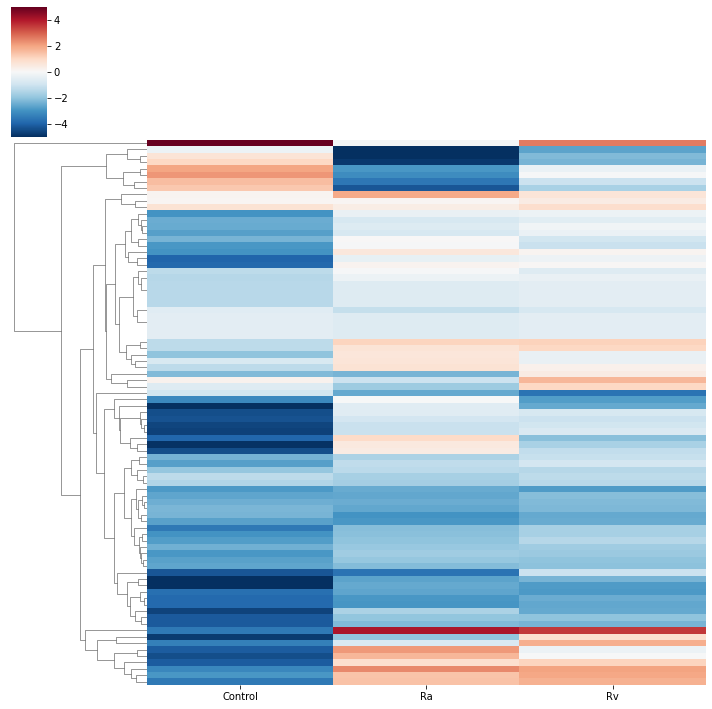

In [1104]:
map_plt = sns.clustermap(cent, metric="euclidean", cmap="RdBu_r", vmin=-5, vmax=5, 
               xticklabels=True, yticklabels=False, col_cluster=False)
map_plt.ax_col_dendrogram.set_visible(False)

plt.show()

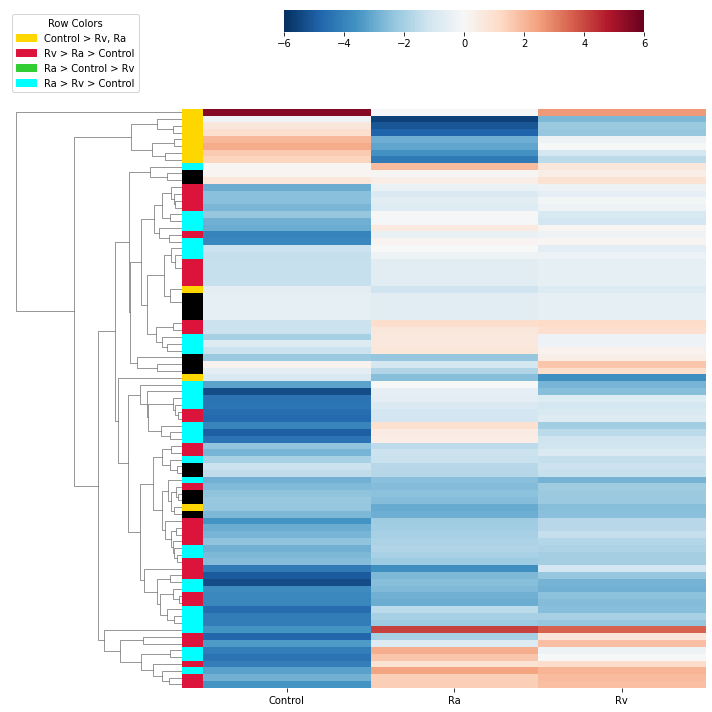

In [1107]:
from matplotlib.colors import TwoSlopeNorm

legend_labels = ['Control > Rv, Ra', 'Rv > Ra > Control', 'Ra > Control > Rv', 'Ra > Rv > Control']
legend_colors = ['gold', 'crimson', 'limegreen', 'cyan', 'black']
row_colors = [legend_colors[0] if Control > Rv and Control > Ra else  # or maybe 'Control > Rv or Control > Ra' ????
              legend_colors[1] if Rv > Ra > Control else
              legend_colors[2] if Ra > Control > Rv else
              legend_colors[3] if Ra > Rv > Control else
              legend_colors[4]
              for Control, Ra, Rv in zip(cent['Control'], cent['Ra'], cent['Rv'])]

norm = TwoSlopeNorm(vcenter=0, vmin=-6, vmax=6)
g = sns.clustermap(cent, metric="euclidean", cmap="RdBu_r", norm=norm,
                   xticklabels=True, yticklabels=False,
                   dendrogram_ratio=(0.25, 0.15),  # fraction of the figure dedicated to row and column dendrograms
                   row_colors=row_colors,
                   col_cluster=False,
                   cbar_pos=[.4, .95, .5, .03],  # x, y, width, height in "figure coordinates"
                   cbar_kws={'orientation': "horizontal"})
# create a legend, use the row dendogram for positioning
legend_handles = [plt.Rectangle((0, 0), 0, 0, color=color, label=label)
                  for color, label in zip(legend_colors, legend_labels)]
g.ax_row_dendrogram.legend(title='Row Colors', handles=legend_handles, loc='lower left', bbox_to_anchor=(0, 1.02))
plt.show()

# Fold Change

In [882]:
intr = ra_rv.merge(df_int, on=['gene'], how='inner')
intr

,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,...,sample_1_y,sample_2_y,status_y,value_1_y,value_2_y,log2(fold_change)_y,test_stat_y,p_value_y,q_value_y,significant_y
0,Cyp27a1,Ra,Rv,OK,4.52616,13.3868,1.56445,3.73657,0.00005,0.000527,...,Ctrl,Rv,OK,32.681000,13.3868,-1.28764,-3.38429,0.00005,0.000527,yes
1,Serpinb2,Ra,Rv,OK,513.10400,20.7699,-4.62668,-14.98500,0.00005,0.000527,...,Ctrl,Rv,OK,1.611980,20.7699,3.68759,7.58907,0.00005,0.000527,yes
2,Rab7b,Ra,Rv,OK,20.78690,43.3432,1.06013,2.85444,0.00010,0.000991,...,Ctrl,Rv,OK,118.964000,43.3432,-1.45664,-3.94051,0.00005,0.000527,yes
3,Ptgs2,Ra,Rv,OK,371.33000,29.0941,-3.67390,-10.64330,0.00005,0.000527,...,Ctrl,Rv,OK,0.328475,29.0941,6.46880,10.00940,0.00005,0.000527,yes
4,Mgat4a,Ra,Rv,OK,70.09530,25.9314,-1.43462,-4.29402,0.00005,0.000527,...,Ctrl,Rv,OK,6.680070,25.9314,1.95676,5.23849,0.00005,0.000527,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Acsl1,Ra,Rv,OK,431.43400,186.2550,-1.21186,-3.16163,0.00005,0.000527,...,Ctrl,Rv,OK,15.459900,186.2550,3.59068,9.53738,0.00005,0.000527,yes
78,Gas6,Ra,Rv,OK,8.39169,17.3220,1.04557,2.90775,0.00010,0.000991,...,Ctrl,Rv,OK,82.042200,17.3220,-2.24376,-6.19994,0.00005,0.000527,yes
79,Bcl2a1a,Ra,Rv,OK,395.83800,99.9439,-1.98572,-5.86794,0.00005,0.000527,...,Ctrl,Rv,OK,4.162480,99.9439,4.58560,9.01842,0.00005,0.000527,yes
80,Zc3h12c,Ra,Rv,OK,43.01970,18.7162,-1.20071,-3.47367,0.00005,0.000527,...,Ctrl,Rv,OK,7.454010,18.7162,1.32820,3.52703,0.00005,0.000527,yes


In [981]:
#Fold change Ra vs. Rv
df3 = intr[['gene','value_1_y','value_1','value_2','log2(fold_change)']].rename(columns={'value_1_y':'Ctrl','value_1':'Ra','value_2':'Rv'})
df3

,gene,Ctrl,Ra,Rv,log2(fold_change)
0,Cyp27a1,32.681000,4.52616,13.3868,1.56445
1,Serpinb2,1.611980,513.10400,20.7699,-4.62668
2,Rab7b,118.964000,20.78690,43.3432,1.06013
3,Ptgs2,0.328475,371.33000,29.0941,-3.67390
4,Mgat4a,6.680070,70.09530,25.9314,-1.43462
...,...,...,...,...,...
77,Acsl1,15.459900,431.43400,186.2550,-1.21186
78,Gas6,82.042200,8.39169,17.3220,1.04557
79,Bcl2a1a,4.162480,395.83800,99.9439,-1.98572
80,Zc3h12c,7.454010,43.01970,18.7162,-1.20071


In [982]:
df3['group']=df3.apply(lambda x: 'Ctrl>Rv>Ra' if x['Ctrl']>x['Rv']>x['Ra']
                      else 'Rv>Ra>Ctrl'if x['Rv']>x['Ra']>x['Ctrl']
                      else 'Ra>Ctrl>Rv' if x['Ra']>x['Ctrl']>x['Rv']
                      else 'Ra>Rv>Ctrl' if x['Ra']>x['Rv']>x['Ctrl']
                      else 'Other', axis=1)
df3

,gene,Ctrl,Ra,Rv,log2(fold_change),group
0,Cyp27a1,32.681000,4.52616,13.3868,1.56445,Ctrl>Rv>Ra
1,Serpinb2,1.611980,513.10400,20.7699,-4.62668,Ra>Rv>Ctrl
2,Rab7b,118.964000,20.78690,43.3432,1.06013,Ctrl>Rv>Ra
3,Ptgs2,0.328475,371.33000,29.0941,-3.67390,Ra>Rv>Ctrl
4,Mgat4a,6.680070,70.09530,25.9314,-1.43462,Ra>Rv>Ctrl
...,...,...,...,...,...,...
77,Acsl1,15.459900,431.43400,186.2550,-1.21186,Ra>Rv>Ctrl
78,Gas6,82.042200,8.39169,17.3220,1.04557,Ctrl>Rv>Ra
79,Bcl2a1a,4.162480,395.83800,99.9439,-1.98572,Ra>Rv>Ctrl
80,Zc3h12c,7.454010,43.01970,18.7162,-1.20071,Ra>Rv>Ctrl


In [992]:
df4 = df3[['gene','Ctrl','log2(fold_change)','group']]
df4['Ctrl'] = df3['Ctrl'].add(1).apply(np.log2)

df4

/var/folders/bh/yzgycbkj1jn1bd9p52t5s8s40000gn/T/ipykernel_861/2986625710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Ctrl'] = df3['Ctrl'].add(1).apply(np.log2)


,gene,Ctrl,log2(fold_change),group
0,Cyp27a1,5.073863,1.56445,Ctrl>Rv>Ra
1,Serpinb2,1.385144,-4.62668,Ra>Rv>Ctrl
2,Rab7b,6.906458,1.06013,Ctrl>Rv>Ra
3,Ptgs2,0.409771,-3.67390,Ra>Rv>Ctrl
4,Mgat4a,2.941119,-1.43462,Ra>Rv>Ctrl
...,...,...,...,...
77,Acsl1,4.040884,-1.21186,Ra>Rv>Ctrl
78,Gas6,6.375773,1.04557,Ctrl>Rv>Ra
79,Bcl2a1a,2.368064,-1.98572,Ra>Rv>Ctrl
80,Zc3h12c,3.079636,-1.20071,Ra>Rv>Ctrl


In [993]:
df4['log2(fold_change)'] = df4['log2(fold_change)'].transform(lambda x: 1/(2**x))
df4=df4.rename(columns={'Ctrl':'Expression level (Control)','log2(fold_change)':'Fold change(Ra/Rv)'})

df4

/var/folders/bh/yzgycbkj1jn1bd9p52t5s8s40000gn/T/ipykernel_861/1462392544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['log2(fold_change)'] = df4['log2(fold_change)'].transform(lambda x: 1/(2**x))


,gene,Expression level (Control),Fold change(Ra/Rv),group
0,Cyp27a1,5.073863,0.338107,Ctrl>Rv>Ra
1,Serpinb2,1.385144,24.704124,Ra>Rv>Ctrl
2,Rab7b,6.906458,0.479589,Ctrl>Rv>Ra
3,Ptgs2,0.409771,12.763039,Ra>Rv>Ctrl
4,Mgat4a,2.941119,2.703110,Ra>Rv>Ctrl
...,...,...,...,...
77,Acsl1,4.040884,2.316361,Ra>Rv>Ctrl
78,Gas6,6.375773,0.484453,Ctrl>Rv>Ra
79,Bcl2a1a,2.368064,3.960603,Ra>Rv>Ctrl
80,Zc3h12c,3.079636,2.298528,Ra>Rv>Ctrl


In [998]:
testing = df4
testing.sort_values(by='Fold change(Ra/Rv)', ascending=False, inplace=True)
testing

,gene,Expression level (Control),Fold change(Ra/Rv),group
1,Serpinb2,1.385144,24.704124,Ra>Rv>Ctrl
76,Slc7a2,2.137048,21.508723,Ra>Rv>Ctrl
50,Il1a,1.201151,15.962448,Ra>Rv>Ctrl
3,Ptgs2,0.409771,12.763039,Ra>Rv>Ctrl
58,Il6,0.000000,11.813626,Ra>Rv>Ctrl
...,...,...,...,...
33,Iigp1,0.575495,0.420469,Rv>Ra>Ctrl
44,Thbs1,4.712304,0.393911,Rv>Ra>Ctrl
39,Arhgap19,6.020284,0.348493,Ctrl>Rv>Ra
0,Cyp27a1,5.073863,0.338107,Ctrl>Rv>Ra


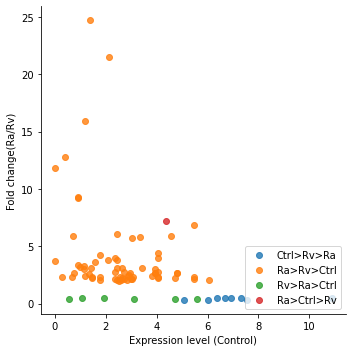

In [994]:
l = sns.lmplot(x='Expression level (Control)', y='Fold change(Ra/Rv)', data=df4,
          fit_reg=False, hue='group', legend=False)
#l.set(xlim=(0,None), ylim=(0,None))
plt.legend(loc='lower right')
plt.show()

## Gene Annotation

In [999]:
# Export gene list 

df_int.to_excel('/Users/csb/Desktop/RNA-seq/DEG_data.xlsx', index=False)

### KEGG Pathway

In [1118]:
df_keg = pd.read_csv('/Users/csb/Desktop/RNA-seq/KEGG_pathway.csv', sep='\t')
df_keg

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,KEGG_PATHWAY,mmu05169:Epstein-Barr virus infection,50,6.501951,8.530741e-19,"CD40, H2-T22, H2-K1, TNFAIP3, ITGAL, RBPJ, TNF...",447,231,9011,4.363385,2.644530e-16,2.644530e-16,2.132685e-16
1,KEGG_PATHWAY,mmu05164:Influenza A,39,5.071521,2.911483e-15,"OAS1A, ADAR, TNF, ICAM1, OAS1G, IFIH1, SOCS3, ...",447,173,9011,4.544478,8.948398e-13,4.512799e-13,3.639354e-13
2,KEGG_PATHWAY,mmu04668:TNF signaling pathway,30,3.901170,9.131243e-14,"CEBPB, TNFAIP3, CXCL1, PTGS2, CXCL2, TNF, ICAM...",447,113,9011,5.351904,2.829070e-11,9.435618e-12,7.609369e-12
3,KEGG_PATHWAY,mmu04621:NOD-like receptor signaling pathway,41,5.331599,1.398622e-13,"RNF31, TXN1, ITPR1, OAS1A, TNFAIP3, NOD1, CXCL...",447,213,9011,3.880339,4.336531e-11,1.083932e-11,8.741387e-12
4,KEGG_PATHWAY,mmu05162:Measles,32,4.161248,3.048922e-12,"OAS1A, TNFAIP3, CBLB, ADAR, IL2RG, OAS1G, IFIH...",447,146,9011,4.418375,9.451573e-10,1.890332e-10,1.524461e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,KEGG_PATHWAY,mmu04917:Prolactin signaling pathway,8,1.040312,7.261951e-02,"SOCS3, SOCS1, SRC, STAT1, IRF1, STAT3, JAK2, F...",447,74,9011,2.179334,1.000000e+00,2.587592e-01,2.086767e-01
87,KEGG_PATHWAY,mmu04722:Neurotrophin signaling pathway,11,1.430429,7.655710e-02,"NFKBIA, JUN, SORT1, ARHGDIB, MATK, IRAK3, FOXO...",447,121,9011,1.832622,1.000000e+00,2.696898e-01,2.174918e-01
88,KEGG_PATHWAY,mmu03250:Viral life cycle - HIV-1,7,0.910273,8.001743e-02,"BST2, APOBEC3, TRIM30D, MX2, MX1, CXCR4, SERINC5",447,61,9011,2.313309,1.000000e+00,2.787124e-01,2.247681e-01
89,KEGG_PATHWAY,mmu04613:Neutrophil extracellular trap formation,16,2.080624,9.174779e-02,"GSDMD, HDAC5, ITGAM, NCF1, SRC, FPR1, CYBB, FP...",447,208,9011,1.550680,1.000000e+00,3.160202e-01,2.548550e-01


In [1124]:
# Six mmost significnatly enriched KEGG
df_kegg = df_keg[['Term','Count','PValue','Genes','List Total','Fold Enrichment','FDR']]

df6 = df_kegg[:7]
df6['PValue'] = df6['PValue'].apply(np.log).apply(lambda x: x*-1) # -Log(p-value)
df6

/var/folders/bh/yzgycbkj1jn1bd9p52t5s8s40000gn/T/ipykernel_861/2871568257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PValue'] = df6['PValue'].apply(np.log).apply(lambda x: x*-1) # -Log(p-value)


,Term,Count,PValue,Genes,List Total,Fold Enrichment,FDR
0,mmu05169:Epstein-Barr virus infection,50,41.605441,"CD40, H2-T22, H2-K1, TNFAIP3, ITGAL, RBPJ, TNF...",447,4.363385,2.132685e-16
1,mmu05164:Influenza A,39,33.470114,"OAS1A, ADAR, TNF, ICAM1, OAS1G, IFIH1, SOCS3, ...",447,4.544478,3.639354e-13
2,mmu04668:TNF signaling pathway,30,30.024489,"CEBPB, TNFAIP3, CXCL1, PTGS2, CXCL2, TNF, ICAM...",447,5.351904,7.609369e-12
3,mmu04621:NOD-like receptor signaling pathway,41,29.598119,"RNF31, TXN1, ITPR1, OAS1A, TNFAIP3, NOD1, CXCL...",447,3.880339,8.741387e-12
4,mmu05162:Measles,32,26.516233,"OAS1A, TNFAIP3, CBLB, ADAR, IL2RG, OAS1G, IFIH...",447,4.418375,1.524461e-10
5,mmu05417:Lipid and atherosclerosis,38,24.575769,"CD40, NCF1, SRC, ITPR1, CXCL1, CXCL2, TNF, TAN...",447,3.546462,8.844393e-10
6,mmu05167:Kaposi sarcoma-associated herpesvirus...,37,22.071510,"CD86, H2-T22, SRC, H2-M2, H2-M3, H2-K1, H2-Q4,...",447,3.329808,9.274848e-09


### Biological process

In [1145]:
df_bio = pd.read_csv('/Users/csb/Desktop/RNA-seq/Bioprocess.csv', sep='\t')
df_bio

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,UP_KW_BIOLOGICAL_PROCESS,KW-0391~Immunity,105,13.654096,2.275428e-31,"IFITM3, CD86, CLEC4N, H2-K1, HP, RNF19B, IFI35...",467,689,10827,3.533144,2.798776e-29,2.798776e-29,2.480216e-29
1,UP_KW_BIOLOGICAL_PROCESS,KW-0399~Innate immunity,75,9.752926,5.443284e-31,"IFITM3, CLEC4N, ADAR, IFI35, IFIT1, IFIT3, IFI...",467,359,10827,4.843486,6.695239e-29,3.347620e-29,2.966590e-29
2,UP_KW_BIOLOGICAL_PROCESS,KW-0051~Antiviral defense,30,3.901170,4.982528e-17,"IFITM3, OAS1A, ADAR, IFIT1, IFIT3, IFIT2, OAS1...",467,99,10827,7.025501,6.128510e-15,2.042837e-15,1.810319e-15
3,UP_KW_BIOLOGICAL_PROCESS,KW-0444~Lipid biosynthesis,31,4.031209,3.138459e-11,"IDI1, MVK, MSMO1, HMGCR, HSD17B7, PTGS2, ACACA...",467,170,10827,4.227699,3.860301e-09,9.650760e-10,8.552300e-10
4,UP_KW_BIOLOGICAL_PROCESS,KW-0752~Steroid biosynthesis,16,2.080624,8.718064e-11,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,42,10827,8.832059,1.072321e-08,2.144644e-09,1.900538e-09
5,UP_KW_BIOLOGICAL_PROCESS,KW-0756~Sterol biosynthesis,13,1.690507,1.958842e-10,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,26,10827,11.592077,2.409376e-08,3.506051e-09,3.106988e-09
6,UP_KW_BIOLOGICAL_PROCESS,KW-0152~Cholesterol biosynthesis,12,1.560468,1.995313e-10,"FDPS, IDI1, NSDHL, MVK, HMGCS1, PMVK, DHCR24, ...",467,21,10827,13.248088,2.454236e-08,3.506051e-09,3.106988e-09
7,UP_KW_BIOLOGICAL_PROCESS,KW-0395~Inflammatory response,29,3.771131,1.416852e-08,"TNFAIP3, CXCL1, MEFV, CXCL2, RPS6KA4, C3, CNR2...",467,193,10827,3.483629,1.742726e-06,2.178410e-07,1.930461e-07
8,UP_KW_BIOLOGICAL_PROCESS,KW-1207~Sterol metabolism,16,2.080624,1.130937e-07,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,67,10827,5.536514,1.391043e-05,1.545614e-06,1.369690e-06
9,UP_KW_BIOLOGICAL_PROCESS,KW-0153~Cholesterol metabolism,15,1.950585,2.160183e-07,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,61,10827,5.701022,2.656990e-05,2.617974e-06,2.319993e-06


In [1146]:
# Six mmost significnatly enriched Biological Process (BP)
df_BP = df_bio[['Term','Count','PValue','Genes','List Total','Fold Enrichment','FDR']]

df7 = df_BP[:7]
df7['PValue'] = df7['PValue'].apply(np.log).apply(lambda x: x*-1) # -Log(p-value)
df7

/var/folders/bh/yzgycbkj1jn1bd9p52t5s8s40000gn/T/ipykernel_861/2777148805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['PValue'] = df7['PValue'].apply(np.log).apply(lambda x: x*-1) # -Log(p-value)


,Term,Count,PValue,Genes,List Total,Fold Enrichment,FDR
0,KW-0391~Immunity,105,70.557970,"IFITM3, CD86, CLEC4N, H2-K1, HP, RNF19B, IFI35...",467,3.533144,2.480216e-29
1,KW-0399~Innate immunity,75,69.685755,"IFITM3, CLEC4N, ADAR, IFI35, IFIT1, IFIT3, IFI...",467,4.843486,2.966590e-29
2,KW-0051~Antiviral defense,30,37.538009,"IFITM3, OAS1A, ADAR, IFIT1, IFIT3, IFIT2, OAS1...",467,7.025501,1.810319e-15
3,KW-0444~Lipid biosynthesis,31,24.184704,"IDI1, MVK, MSMO1, HMGCR, HSD17B7, PTGS2, ACACA...",467,4.227699,8.552300e-10
4,KW-0752~Steroid biosynthesis,16,23.163039,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,8.832059,1.900538e-09
5,KW-0756~Sterol biosynthesis,13,22.353497,"IDI1, FDPS, MVK, HMGCS1, DHCR24, MSMO1, HMGCR,...",467,11.592077,3.106988e-09
6,KW-0152~Cholesterol biosynthesis,12,22.335050,"FDPS, IDI1, NSDHL, MVK, HMGCS1, PMVK, DHCR24, ...",467,13.248088,3.106988e-09


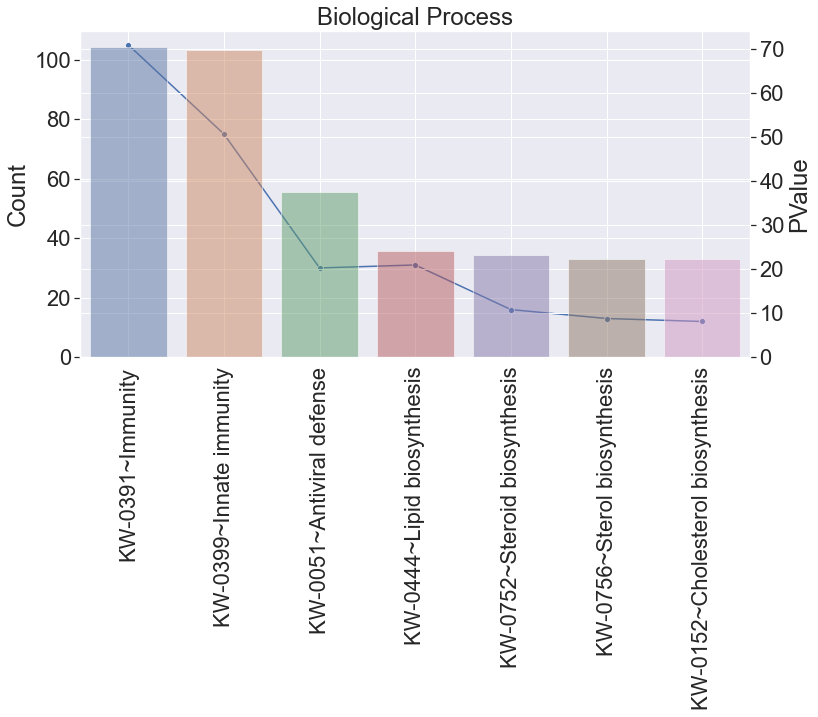

In [1186]:
#Biological Process


ax3 = sns.set_style(style=None, rc=None)

fig, ax3 = plt.subplots(figsize=(12,6))


# line plot of gene count
sns.lineplot(data = df7['Count'], marker='o', sort = False, ax=ax3).set(title= "Biological Process")
ax3.set_yticks(np.arange(0,110,20))

plt.xticks(rotation=90)


ax4 = ax3.twinx()


sns.barplot(data = df7, x='Term', y='PValue', alpha=0.5, ax=ax4)
ax4.set_yticks(np.arange(0,80,10))

plt.show()

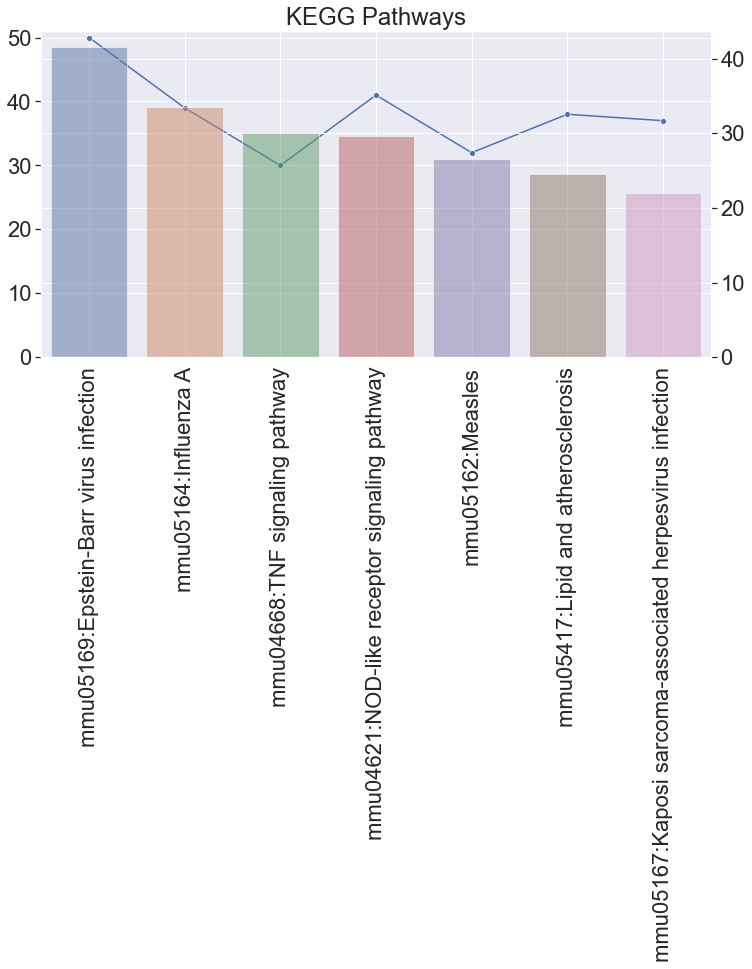

In [1191]:
#KEGG Pathways

ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(12,6))


# line plot of gene count
sns.lineplot(data = df6['Count'], marker='o', sort = False, ax=ax1).set(title= "KEGG Pathways")
ax1.set_yticks(np.arange(0,55,10))

plt.xticks(rotation=90)
plt.ylabel('')

ax2 = ax1.twinx()


sns.barplot(data = df6, x='Term', y='PValue', alpha=0.5, ax=ax2)
plt.ylabel('')

plt.show()